In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


## Checking for any missing data

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


There seem to be no null-values which is good!

In [90]:
df.duplicated().sum()

0

This means there are no duplicate values in the dataset.

# Starting EDA

In [91]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


### Key findings

- **Avg age of customers** : 44.027020
- **Avg subscription length** : 12.490100
- **Avg monthly bill** : 65.053197
- **Avg total usage(GB)** : 274.393650
- **Avg CHURN rate** : 49%

In [92]:
non_numeric_stats = df.describe(include='object')
print(non_numeric_stats)


              Name  Gender Location
count       100000  100000   100000
unique      100000       2        5
top     Customer_1  Female  Houston
freq             1   50216    20157


#### Checking the age range

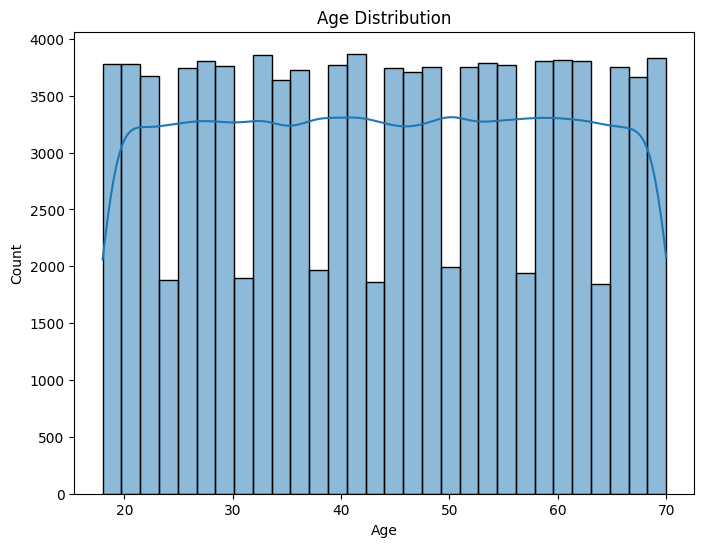

In [93]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)  # Adjust the number of bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The ages range from 18 to 70, having an almost even spread of all ages.

### Distibution of subscriptions

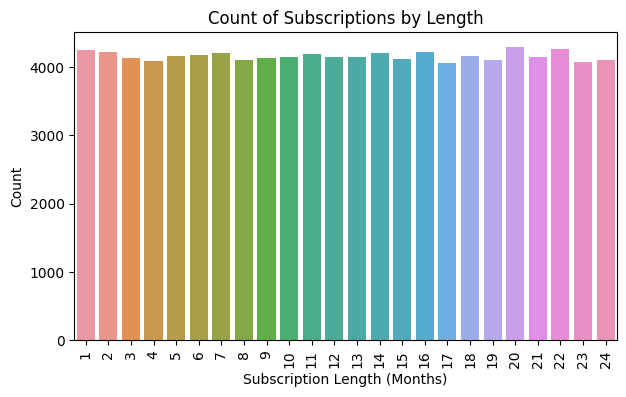

In [94]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Subscription_Length_Months')
plt.title('Count of Subscriptions by Length')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


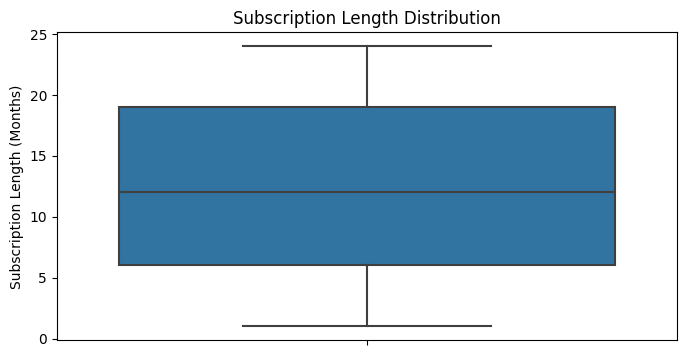

In [95]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, y='Subscription_Length_Months')
plt.title('Subscription Length Distribution')
plt.ylabel('Subscription Length (Months)')
plt.show()

This too seems to have an even distribution

### Monthly bill

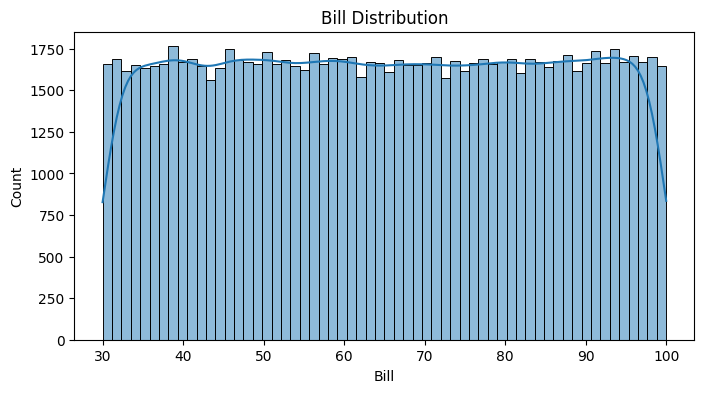

In [96]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Monthly_Bill'], bins=60, kde=True)  # Adjust the number of bins as needed
plt.title('Bill Distribution')
plt.xlabel('Bill')
plt.ylabel('Count')
plt.show()

This too has a even spread like others so far

### Total usage (GB)

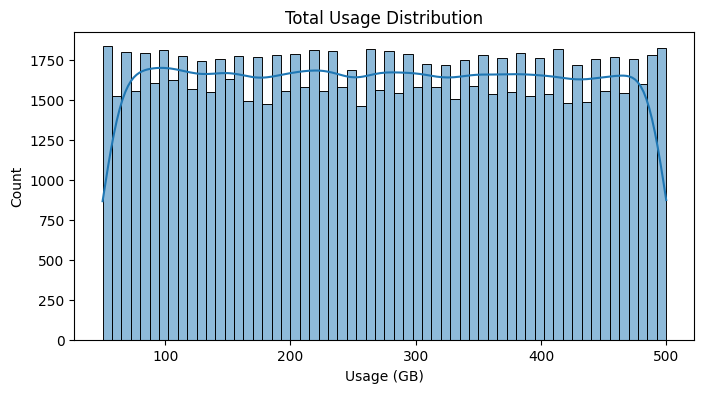

In [97]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Total_Usage_GB'], bins=60, kde=True)  # Adjust the number of bins as needed
plt.title('Total Usage Distribution')
plt.xlabel('Usage (GB)')
plt.ylabel('Count')
plt.show()

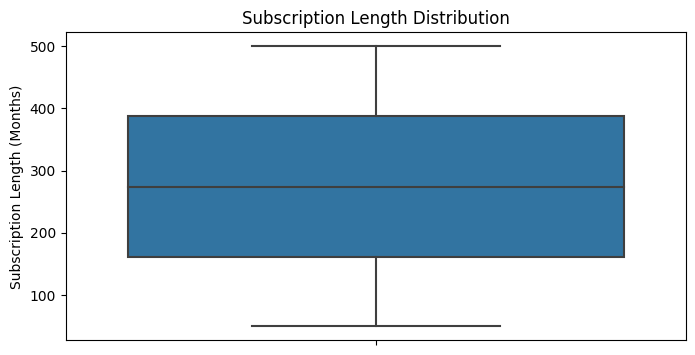

In [98]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, y='Total_Usage_GB')
plt.title('Subscription Length Distribution')
plt.ylabel('Subscription Length (Months)')
plt.show()

This too has even spread

### Gender

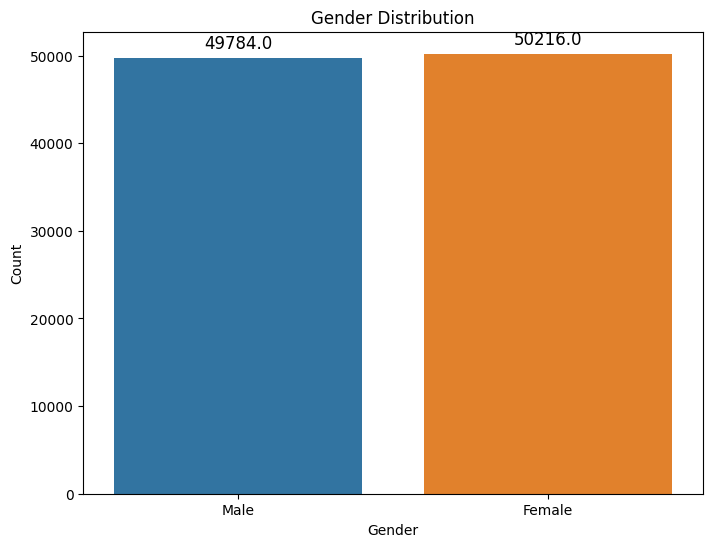

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the 'Gender' column
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()


### Locations

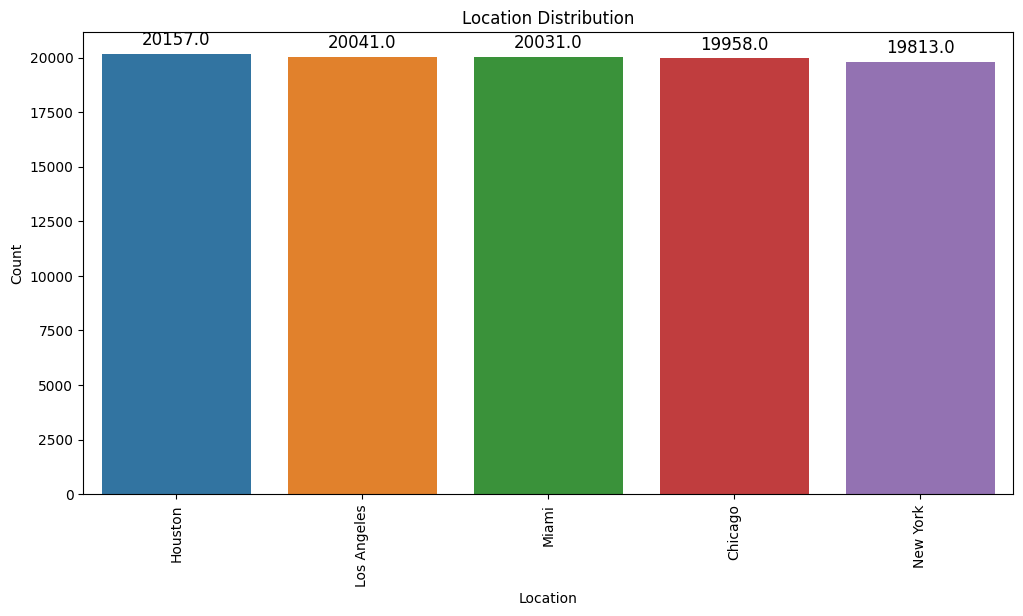

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the 'Location' column
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()


Again, an almost equal distribution

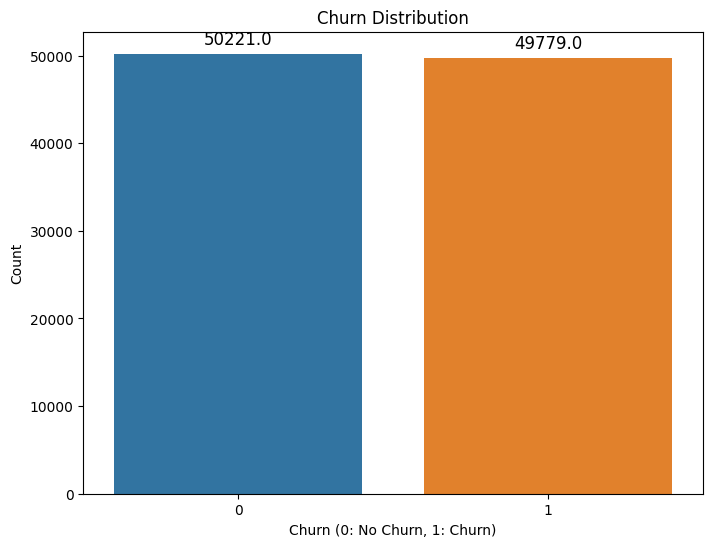

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the 'Churn' column
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()


In [102]:
#  Transforming object data for further anyalysis

In [103]:
# Customer name doesn't seem to have much significance. So let's remove it.

In [104]:
df = df.drop(columns=['Name','CustomerID'])
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [105]:
# Encoding the rest object-type data

In [106]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [107]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,0,Los Angeles,17,73.36,236,0
1,62,1,New York,1,48.76,172,0
2,24,1,Los Angeles,5,85.47,460,0
3,36,1,Miami,3,97.94,297,1
4,46,1,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,0,Houston,23,55.13,226,1
99996,62,1,New York,19,61.65,351,0
99997,64,0,Chicago,17,96.11,251,1
99998,51,1,New York,20,49.25,434,1


In [108]:
df = pd.get_dummies(df, columns=['Location'], dtype=int)
df

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,0,17,73.36,236,0,0,0,1,0,0
1,62,1,1,48.76,172,0,0,0,0,0,1
2,24,1,5,85.47,460,0,0,0,1,0,0
3,36,1,3,97.94,297,1,0,0,0,1,0
4,46,1,19,58.14,266,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,33,0,23,55.13,226,1,0,1,0,0,0
99996,62,1,19,61.65,351,0,0,0,0,0,1
99997,64,0,17,96.11,251,1,1,0,0,0,0
99998,51,1,20,49.25,434,1,0,0,0,0,1


In [109]:
# Let's write a function to perform the transformations so far

In [110]:
def transform_data(df):
    df = df.drop(columns=['Name'])
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    df = pd.get_dummies(df, columns=['Location'], dtype=int, drop_first=True)
    return df

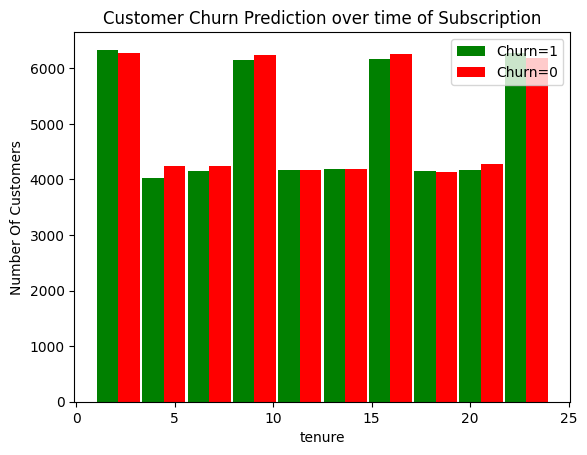

In [111]:
tenure_churn_no = df[df.Churn==0].Subscription_Length_Months
tenure_churn_yes = df[df.Churn==1].Subscription_Length_Months

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction over time of Subscription")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=1','Churn=0'])
plt.legend()
plt.show()

This looks like a balanced dataset

There is some kind of periodic frequency but still both outcomes are almost same everywhere.

## Checking the correlations

Karl-Pearson

In [112]:
import pandas as pd

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Calculate correlations with the 'Churn' column
churn_correlations = correlation_matrix['Churn'].drop('Churn')  # Remove 'Churn' itself from the list

# Sort correlations in descending order
churn_correlations = churn_correlations.abs().sort_values(ascending=False)

# Display correlations
print(churn_correlations)


Location_Houston              0.006728
Location_New York             0.005835
Location_Miami                0.005235
Location_Los Angeles          0.004807
Total_Usage_GB                0.002842
Subscription_Length_Months    0.002328
Gender                        0.002121
Age                           0.001559
Location_Chicago              0.000506
Monthly_Bill                  0.000211
Name: Churn, dtype: float64


Spearman's correlation

In [113]:
# checking for any non-linear correlations

In [114]:
from scipy.stats import spearmanr

# Calculate Spearman rank correlation between 'test1' and all other numerical features
spearman_correlations = df.corr(method='spearman')['Churn'].drop('Churn').abs().sort_values(ascending=False)

# Display the Spearman correlations
print(spearman_correlations)


Location_Houston              0.006728
Location_New York             0.005835
Location_Miami                0.005235
Location_Los Angeles          0.004807
Total_Usage_GB                0.002852
Subscription_Length_Months    0.002330
Gender                        0.002121
Age                           0.001555
Location_Chicago              0.000506
Monthly_Bill                  0.000193
Name: Churn, dtype: float64


In [115]:
# churn_correlations == spearman_correlations

In [116]:
# Let's visualize this

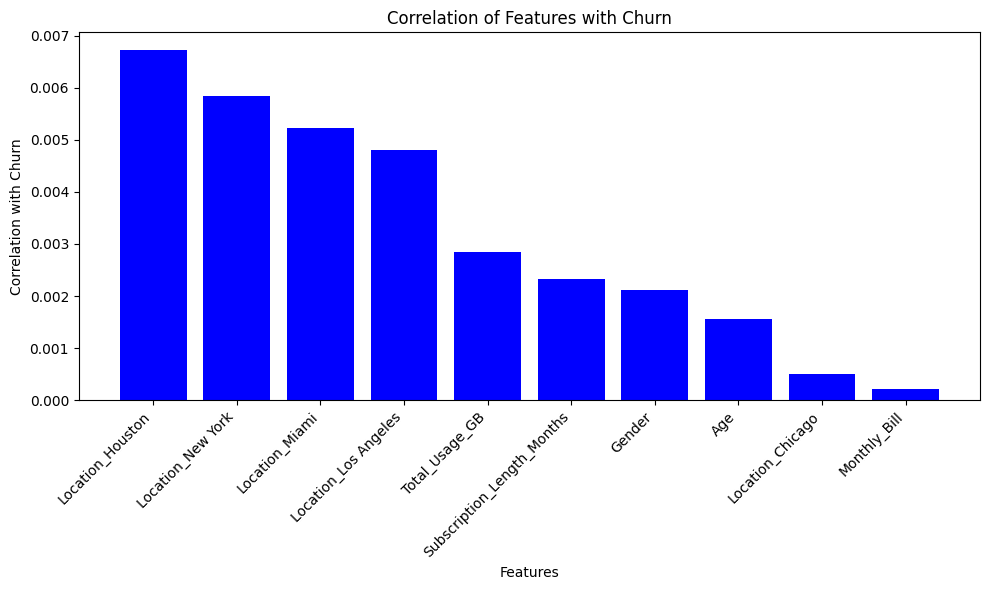

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'churn_correlations' contains the correlations as calculated in the previous answer

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['red' if c < 0 else 'blue' for c in churn_correlations]
plt.bar(churn_correlations.index, churn_correlations, color=colors)
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Features with Churn')
plt.xticks(rotation=45, ha='right')

# Add a horizontal line at 0 for reference
plt.axhline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()


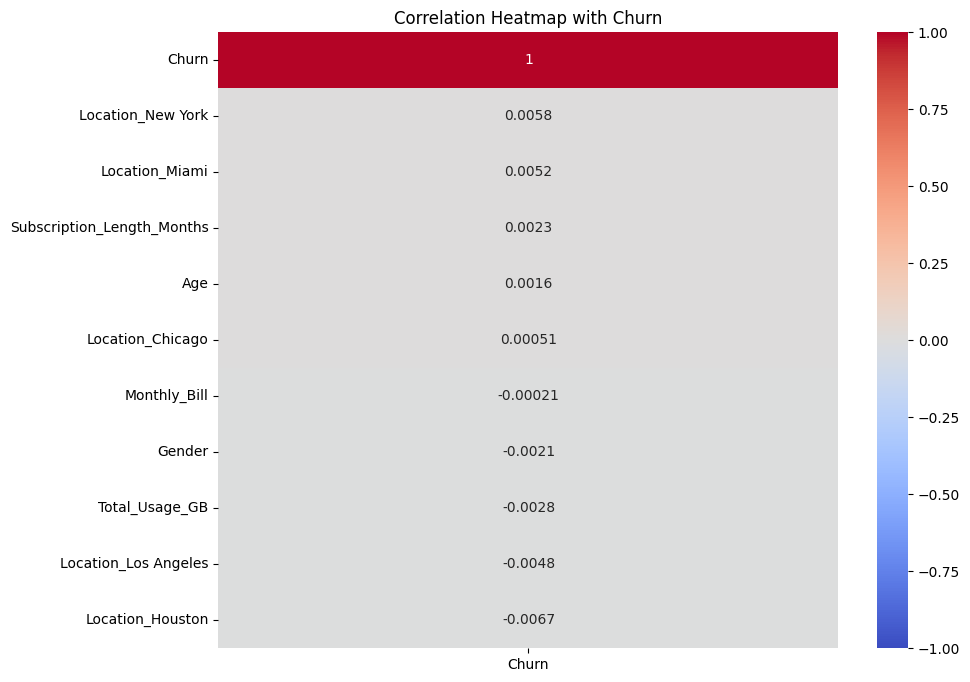

In [118]:
import seaborn as sns

# Assuming 'correlation_matrix' contains the correlation matrix as calculated in the previous answer

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.title('Correlation Heatmap with Churn')
plt.show()


It is likely that if the customer is in new york/ miami or is of higher age, is more likely to churn. But it is more likely to not churn if the customer is in Houston XD.

But all of these correlations are not strong enough. We might need to do some feature engineering.

In [119]:
df

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,0,17,73.36,236,0,0,0,1,0,0
1,62,1,1,48.76,172,0,0,0,0,0,1
2,24,1,5,85.47,460,0,0,0,1,0,0
3,36,1,3,97.94,297,1,0,0,0,1,0
4,46,1,19,58.14,266,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,33,0,23,55.13,226,1,0,1,0,0,0
99996,62,1,19,61.65,351,0,0,0,0,0,1
99997,64,0,17,96.11,251,1,1,0,0,0,0
99998,51,1,20,49.25,434,1,0,0,0,0,1


# Feature Engineering

In [120]:
locations = ['Location_Houston','Location_Los Angeles','Location_Miami','Location_Chicago','Location_New York']

In [121]:
usage_in_loc = {}

for location in locations:

    usage_in_loc[location] = df[f'{location}']*df['Total_Usage_GB']

    # Calculate the correlation between 'test1' and 'Churn'
    location_usage_churn = usage_in_loc[location].corr(df['Churn'],method='spearman')

    # Print the correlation value
    print(f'Correlation between {location} and Churn: {location_usage_churn:.5f}')
#     print(location)


Correlation between Location_Houston and Churn: -0.00696
Correlation between Location_Los Angeles and Churn: -0.00448
Correlation between Location_Miami and Churn: 0.00518
Correlation between Location_Chicago and Churn: 0.00026
Correlation between Location_New York and Churn: 0.00522


In [122]:
location_subs = {}
for location in locations:

    location_subs[location] = df[f'{location}']*df['Subscription_Length_Months']

    # Calculate the correlation between 'test1' and 'Churn'
    location_usage_churn = location_subs[location].corr(df['Churn'],method='spearman')

    # Print the correlation value
    print(f'Correlation between {location},subscription and Churn: {location_usage_churn:.5f}')
#     print(location)


Correlation between Location_Houston,subscription and Churn: -0.00658
Correlation between Location_Los Angeles,subscription and Churn: -0.00476
Correlation between Location_Miami,subscription and Churn: 0.00555
Correlation between Location_Chicago,subscription and Churn: 0.00075
Correlation between Location_New York,subscription and Churn: 0.00576


These values can be ranked relative to each other but they are very weak corrmelations and similar to
original features.
Thus including them in dataframe would add more steps in data transformation and not be of much help.

Perhaps feature engineering doesn't help much as column of our data is evenly spread. Thus we should move onto model selection.

# Model Selection

In [123]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [40]:
from sklearn.model_selection import train_test_split

# Create train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [41]:
# Starting with logistic regression

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
log_reg = Pipeline([('std_sc',StandardScaler()), ('ovr', OneVsRestClassifier(LogisticRegression()))])
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.4992

In [44]:
# Linear SVC

In [45]:
from sklearn.svm import LinearSVC

In [46]:
lin_svc = Pipeline([('std_sc',StandardScaler()), ('lin_svc', LinearSVC(C=10.0))])
lin_svc.fit(X_train,y_train)
lin_svc.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.49868

In [47]:
# SVC

In [48]:
from sklearn.svm import SVC

In [49]:
svc = Pipeline([('std_sc',StandardScaler()), ('lin_svc', SVC(kernel='rbf',C=10.0,random_state=42))])
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.50008

In [50]:
# Random forests

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf_clf = Pipeline([('rf', RandomForestClassifier(n_estimators=2000, n_jobs=-1,random_state=42))])
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.49604

I think the data speaks for the results. But still let's go for ANN

In [53]:
import tensorflow as tf
from tensorflow import keras

In [126]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
2344/2344 [==============================] - 6s 2ms/step - loss: 96.4160 - accuracy: 0.5000
Epoch 2/10
2344/2344 [==============================] - 4s 2ms/step - loss: 2.4234 - accuracy: 0.4986
Epoch 3/10
2344/2344 [==============================] - 5s 2ms/step - loss: 2.0777 - accuracy: 0.5031
Epoch 4/10
2344/2344 [==============================] - 5s 2ms/step - loss: 2.0961 - accuracy: 0.5029
Epoch 5/10
2344/2344 [==============================] - 6s 3ms/step - loss: 2.0478 - accuracy: 0.4988
Epoch 6/10
2344/2344 [==============================] - 5s 2ms/step - loss: 2.2541 - accuracy: 0.5010
Epoch 7/10
2344/2344 [==============================] - 4s 2ms/step - loss: 2.1495 - accuracy: 0.4974
Epoch 8/10
2344/2344 [==============================] - 4s 2ms/step - loss: 1.8680 - accuracy: 0.5026
Epoch 9/10
2344/2344 [==============================] - 5s 2ms/step - loss: 1.9516 - accuracy: 0.5001
Epoch 10/10
2344/2344 [==============================] - 4s 2ms/step - loss: 2.10

The accuracy doesn't seem to improve and hence it makes no sense to increase the epochs.

It can all be traced back to the data having equal probability of customers churning or not.

Not sure if a model like this would be put into production. But we can take the ANN as it gives relatively better results.

In [128]:
import joblib

In [ ]:
joblib.dump(model,'final_model.pkl')

# Conclusion:

- The dataset is balanced but there seem to be no features that significantly contribute to the prediction of customer chutrning and the best predictions that can be achieved was 50%